<a href="https://colab.research.google.com/github/megaramatikaputri/Praktikum-ADW/blob/main/Tugas1_AnalisisData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#memanggil packages yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt

Deret Emas Berjangka

In [45]:
# URL file CSV
url = "https://raw.githubusercontent.com/megaramatikaputri/Praktikum-ADW/refs/heads/main/EmasBerjangka2023.csv"

# Membaca CSV dengan encoding yang sesuai
df = pd.read_csv(url, encoding="utf-8")

# Menghapus spasi ekstra pada nama kolom (jika ada)
df.columns = df.columns.str.strip()

# Mengonversi kolom 'Tanggal' ke format datetime
df["Tanggal"] = pd.to_datetime(df["Tanggal"], dayfirst=True, errors='coerce')

# Daftar kolom yang akan diubah ke float64
cols_to_convert = ["Terakhir", "Pembukaan", "Tertinggi", "Terendah", "Vol.", "Perubahan%"]

# Menghapus karakter non-numeric seperti koma, persen, dan 'K' sebelum konversi
for col in cols_to_convert:
    df[col] = df[col].astype(str).str.replace(',', '', regex=True).str.replace('%', '', regex=True).str.replace('K', '', regex=True).astype(float)
    #The line above was modified to include .str.replace('K', '', regex=True) to remove the 'K' suffix from the 'Vol.' column before converting to float.


# Menampilkan tipe data baru
print(df.dtypes)

# Menampilkan 5 data pertama
df.head()

Tanggal       datetime64[ns]
Terakhir             float64
Pembukaan            float64
Tertinggi            float64
Terendah             float64
Vol.                 float64
Perubahan%           float64
dtype: object


,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,2023-12-29,2.0718,2.0761,2.0841,2.0676,10572.0,-56.0
1,2023-12-28,2.0835,2.0895,2.0982,2.0746,12954.0,0.0
2,2023-12-27,2.0834,2.0680,2.0853,2.0633,59.0,112.0
3,2023-12-26,2.0604,2.0563,2.0696,2.0563,29.0,4.0
4,2023-12-22,2.0596,2.0515,2.0723,2.0494,44.0,87.0


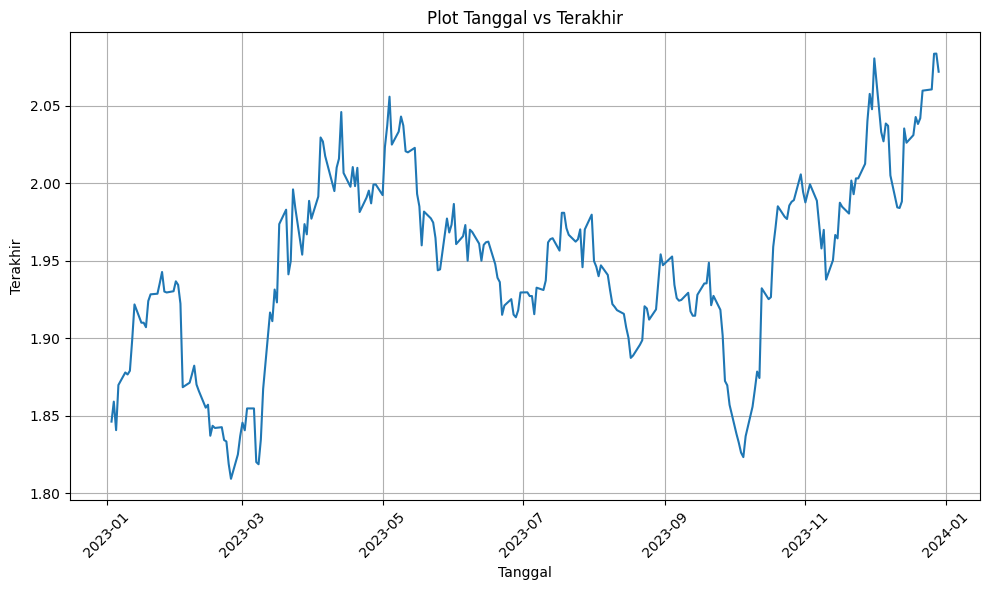

In [46]:
# prompt: plot tanggal vs terakhir

import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(df["Tanggal"], df["Terakhir"])

# Customize the plot (optional)
plt.xlabel("Tanggal")
plt.ylabel("Terakhir")
plt.title("Plot Tanggal vs Terakhir")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping

# Show the plot
plt.show()

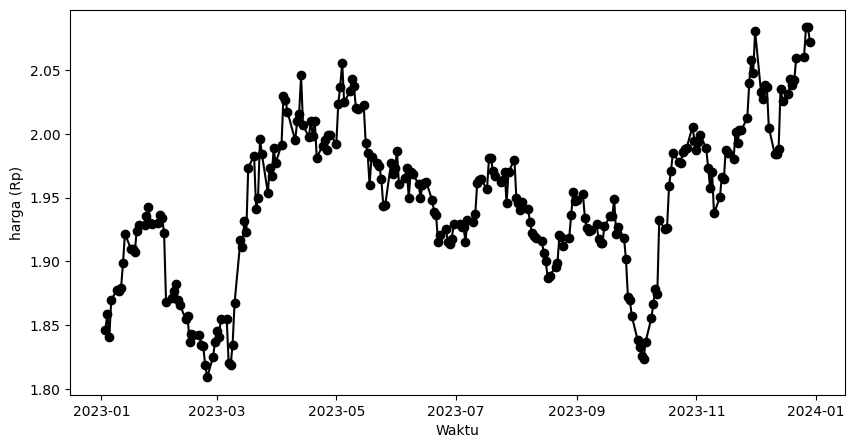

In [49]:
#menampilkan plot deret waktu
plt.figure(figsize=(10,5))
plt.plot(df.Tanggal,df.Terakhir,'-ok')
plt.xlabel('Waktu'), plt.ylabel('harga (Rp)')
plt.show()

Berdasarkan plot diatas, dapat dilihat bahwa:
*  Ada kenaikan harga yang sigifikan pada bulan Maret - Mei dan November - Desember 2023
*   Ada juga penurunan tajam sekitar September 2023 sebelum harga kembali naik
*   Data memiliki fluktuasi naik turun, yang menunjukkan volatilitas (tingkat fluktuasi harga) harga emas berjangka
*   Ada pola musiman atau tren

Ke-stasioneran Data
*   Berdasarkan nilai tengah: Tidak stasioner karena mean berubah seiring waktu (tren naik-turun)
*   Berdasarkan ragam juga berubah → ada periode volatilitas tinggi (misalnya, kenaikan tajam di beberapa bulan).







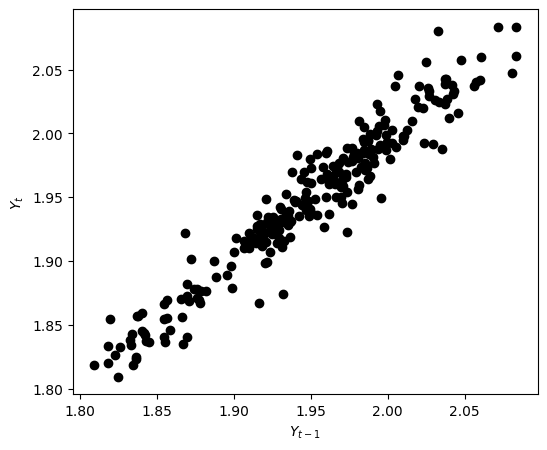

In [50]:
#menampilkan scatterplot antara Yt dan Yt-1
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df.Terakhir, lag=1, c='k')
plt.xlabel(r'$Y_{t-1}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

Scatterplot diatas menunjukkan data dengan autokorelasi positif, di mana titik-titik cenderung membentuk pola yang naik, mengindikasikan adanya hubungan positif antara variabel Yt dan Yt-1




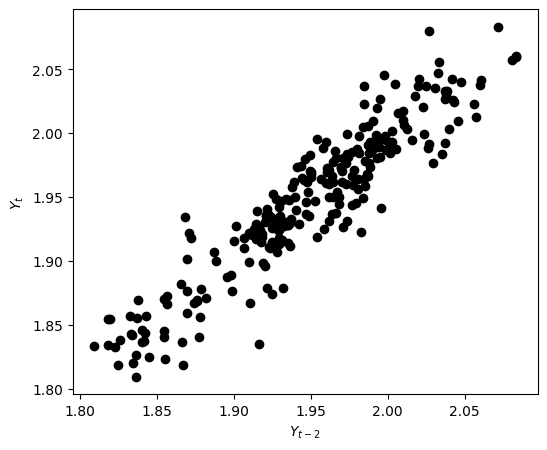

In [51]:
#menampilkan scatterplot antara Yt dan Yt-2
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df.Terakhir, lag=2, c='k')
plt.xlabel(r'$Y_{t-2}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

Scatterplot diatas menunjukkan data dengan autokorelasi positif, di mana titik-titik cenderung membentuk pola yang naik, mengindikasikan adanya hubungan positif antara variabel Yt dan Yt-2



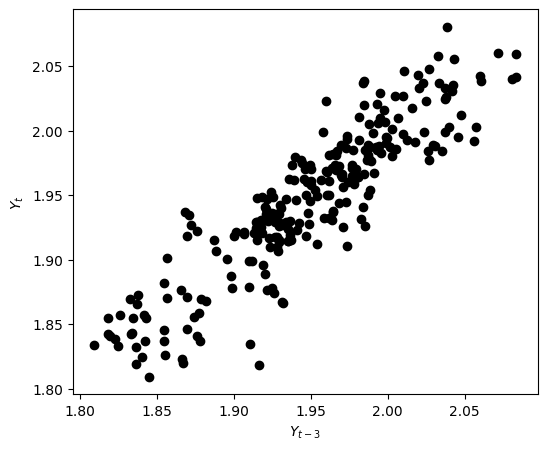

In [52]:
#menampilkan scatterplot antara Yt dan Yt-3
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df.Terakhir, lag=3, c='k')
plt.xlabel(r'$Y_{t-3}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

Scatterplot diatas menunjukkan data dengan autokorelasi positif, di mana titik-titik cenderung membentuk pola yang naik, mengindikasikan adanya hubungan positif antara variabel Yt dan Yt-3

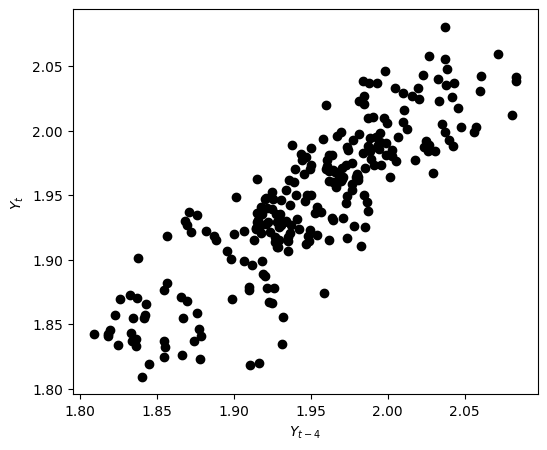

In [88]:
#menampilkan scatterplot antara Yt dan Yt-4
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df.Terakhir, lag=4, c='k')
plt.xlabel(r'$Y_{t-4}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

Scatterplot diatas menunjukkan data dengan autokorelasi positif, di mana titik-titik cenderung membentuk pola yang naik, mengindikasikan adanya hubungan positif antara variabel Yt dan Yt-4

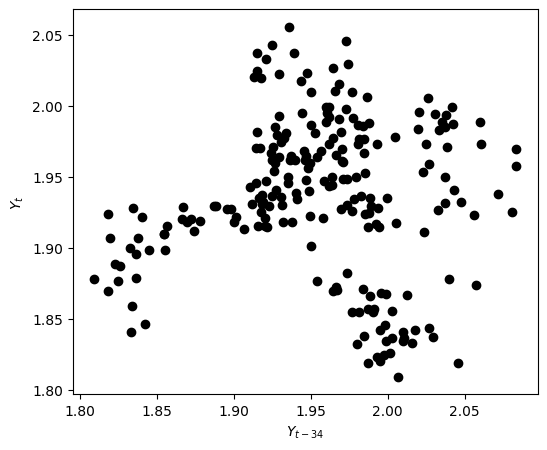

In [109]:
#menampilkan scatterplot antara Yt dan Yt-34
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df.Terakhir, lag=34, c='k')
plt.xlabel(r'$Y_{t-34}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

Pada lag 34 terlihat data menyebar dan tidak terlihat korelasi antar data.

<Figure size 1000x600 with 0 Axes>

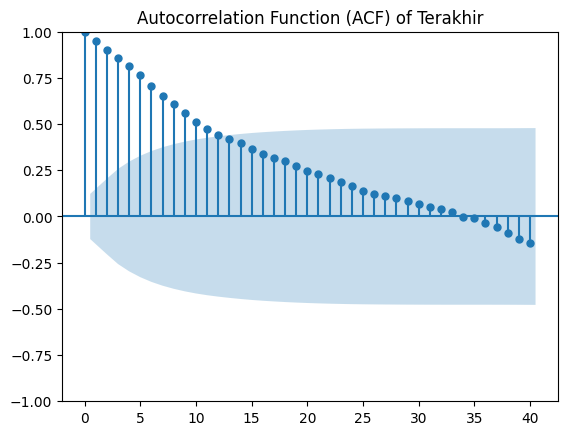

<Figure size 1000x600 with 0 Axes>

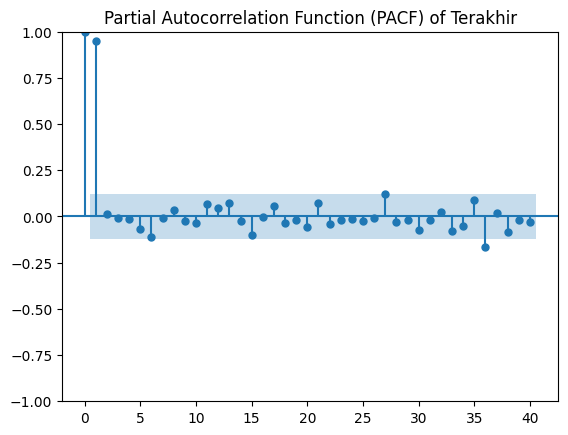

In [108]:
# prompt: bagaimana menguji autokorelasinya?

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ... (your existing code to load and preprocess the data) ...

# Autocorrelation Function (ACF) Plot
plt.figure(figsize=(10, 6))
plot_acf(df["Terakhir"], lags=40, alpha=0.05)  # Adjust lags as needed
plt.title("Autocorrelation Function (ACF) of Terakhir")
plt.show()

# Partial Autocorrelation Function (PACF) Plot
plt.figure(figsize=(10, 6))
plot_pacf(df["Terakhir"], lags=40, alpha=0.05) # Adjust lags as needed
plt.title("Partial Autocorrelation Function (PACF) of Terakhir")
plt.show()